In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

## Opening the pictures and studying size, shape and data type of them.

The Tree Picture Shape: (224, 225, 3)
The Tree Picture dtype: uint8


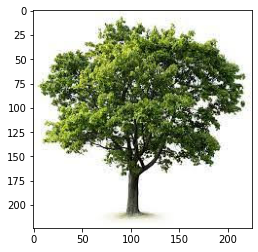

In [ ]:
tree=cv2.imread("/content/unnamed.jpg")
plt.imshow(cv2.cvtColor(tree, cv2.COLOR_BGR2RGB))
print(f'The Tree Picture Shape: {tree.shape}')
print(f'The Tree Picture dtype: {tree.dtype}')

The Landscape Picture Shape: (179, 281, 3)
The Landscape Picture dtype: uint8


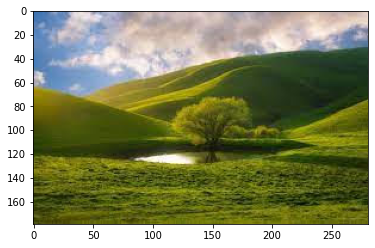

In [ ]:
landscape=cv2.imread("/content/unnamed (1).jpg")
plt.imshow(cv2.cvtColor(landscape, cv2.COLOR_BGR2RGB))
print(f'The Landscape Picture Shape: {landscape.shape}')
print(f'The Landscape Picture dtype: {landscape.dtype}')

## We can also use Pillow lib.

In [ ]:
from PIL import Image
import PIL

In [ ]:
filename = "/content/unnamed (1).jpg"
with Image.open(filename) as img:
  img.load()
  print(type(img))
  print(img.format)
  print(img.size)
  print(img.mode)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
(281, 179)
RGB


## Rotating the picture of the tree

True

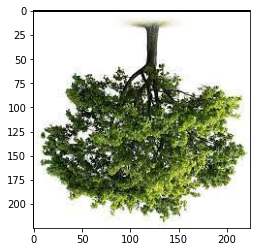

In [ ]:
row ,col , ch=tree.shape

#Rotation 180 degrees

M=cv2.getRotationMatrix2D((col/2,col/2),180,1) #(Center of rotation,rotation degree, zoom)
rotated=cv2.warpAffine(tree,M,(row,col))
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
cv2.imwrite("/content/rotated tree.jpg",rotated)

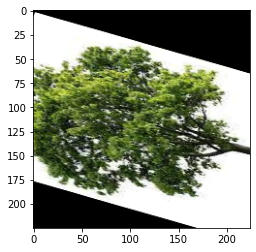

In [ ]:
#Rotation point to point

points1=np.float32([[20,10],[200,150],[200,200]])
points2=np.float32([[10,20],[150,200],[220,220]])
M2=cv2.getAffineTransform(points1,points2)
rotated2=cv2.warpAffine(tree,M2,(row,col))
plt.imshow(cv2.cvtColor(rotated2, cv2.COLOR_BGR2RGB))

Blending the original tree image and the rotated tree

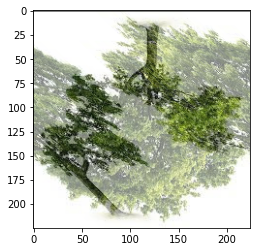

In [ ]:
reshaped_tree=tree.reshape(rotated.shape)
blended=cv2.addWeighted(reshaped_tree,0.5,rotated,0.5,0)
plt.imshow(cv2.cvtColor(blended, cv2.COLOR_BGR2RGB))

## Adding the tree image to the landscape image

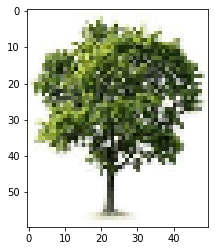

In [ ]:
#Resizing the tree

small_tree=cv2.resize(tree,(50,60))
plt.imshow(cv2.cvtColor(small_tree, cv2.COLOR_BGR2RGB))

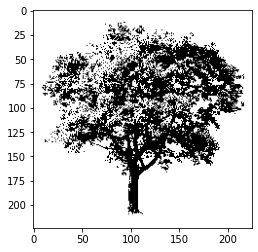

In [ ]:
filename = "/content/unnamed.jpg"
with Image.open(filename) as tree2:
  tree2.load()
threshold=100
img_threshold = tree2.point(lambda x: 255 if x > threshold else 0).convert("1")
plt.imshow(img_threshold)

True

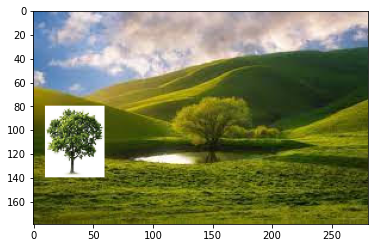

In [ ]:
#Adding the resized tree image to the landscape image:

landscape_copy=landscape.copy()
landscape_copy[80:140,10:60]=small_tree
plt.imshow(cv2.cvtColor(landscape_copy, cv2.COLOR_BGR2RGB))
cv2.imwrite("/content/landscape_copy.jpg",landscape_copy)

True

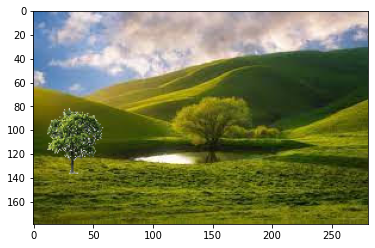

In [ ]:
#Removing the background area

for i in range(60,140):
  for j in range(10,80):
    if landscape_copy[i,j][0]>210 or landscape_copy[i,j][2]>210:
      landscape_copy[i,j]=landscape[i,j]
plt.imshow(cv2.cvtColor(landscape_copy, cv2.COLOR_BGR2RGB))
cv2.imwrite("/content/landscape_copy2.jpg",landscape_copy)

## Splitting the image into channels

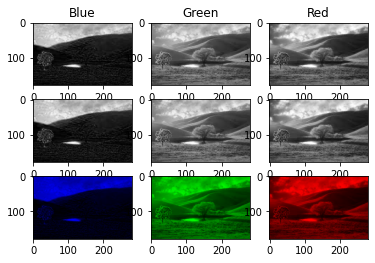

In [ ]:
blue=landscape_copy[:,:,0]
green=landscape_copy[:,:,1]
red=landscape_copy[:,:,2]


plt.subplot(3,3,1)
plt.title("Blue")
plt.imshow(cv2.cvtColor(blue, cv2.COLOR_BGR2RGB))

plt.subplot(3,3,2)
plt.title("Green")
plt.imshow(cv2.cvtColor(green, cv2.COLOR_BGR2RGB))

plt.subplot(3,3,3)
plt.title("Red")
plt.imshow(cv2.cvtColor(red, cv2.COLOR_BGR2RGB))


b, g, r = cv2.split(landscape_copy)


plt.subplot(3,3,4)
# plt.title("Blue")
plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB))

plt.subplot(3,3,5)
# plt.title("Green")
plt.imshow(cv2.cvtColor(g, cv2.COLOR_BGR2RGB))

plt.subplot(3,3,6)
# plt.title("Red")
plt.imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))


landscape_blue=landscape_copy.copy()
landscape_green=landscape_copy.copy()
landscape_red=landscape_copy.copy()

landscape_blue[:,:,1]=landscape_blue[:,:,2]=0
landscape_green[:,:,0]=landscape_green[:,:,2]=0
landscape_red[:,:,0]=landscape_red[:,:,1]=0


plt.subplot(3,3,7)
# plt.title("Blue")
plt.imshow(cv2.cvtColor(landscape_blue, cv2.COLOR_BGR2RGB))

plt.subplot(3,3,8)
# plt.title("Green")
plt.imshow(cv2.cvtColor(landscape_green, cv2.COLOR_BGR2RGB))

plt.subplot(3,3,9)
# plt.title("Red")
plt.imshow(cv2.cvtColor(landscape_red, cv2.COLOR_BGR2RGB))


## Color Reduction

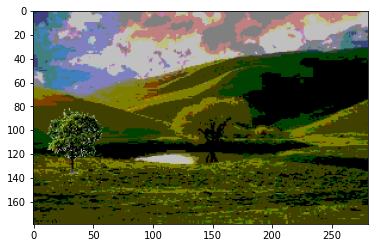

In [ ]:
#Reducing the colors manualy

div = 64
quantized = landscape_copy // div * div 
plt.imshow(cv2.cvtColor(quantized, cv2.COLOR_BGR2RGB))

## Smoothing

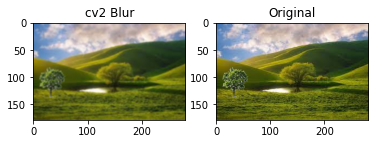

In [ ]:
blur2=cv2.blur(landscape_copy,(3,3))

plt.subplot(1,2,1)
plt.title("cv2 Blur")
plt.imshow(cv2.cvtColor(blur2, cv2.COLOR_BGR2RGB))
cv2.imwrite("/content/blur2.jpg",blur2)

plt.subplot(1,2,2)
plt.title("Original")
plt.imshow(cv2.cvtColor(landscape_copy, cv2.COLOR_BGR2RGB))

True

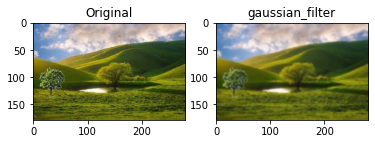

In [ ]:
gaussian_filter=cv2.GaussianBlur(landscape_copy,ksize=(5,5),sigmaX=1)

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(landscape_copy, cv2.COLOR_BGR2RGB))


plt.subplot(1,2,2)
plt.title("gaussian_filter")
plt.imshow(cv2.cvtColor(gaussian_filter, cv2.COLOR_BGR2RGB))
cv2.imwrite("/content/GaussianBlur.jpg",gaussian_filter)


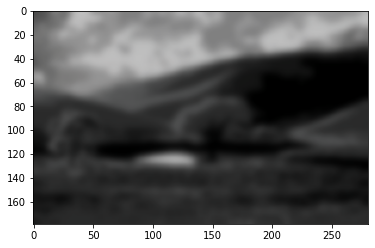

In [ ]:
#Trying another library (scipy)

from scipy import misc,ndimage

very_blurred = ndimage.gaussian_filter(quantized, sigma=3)
     
plt.imshow(very_blurred)

True

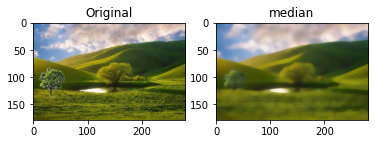

In [ ]:
median=cv2.medianBlur(landscape_copy,9)

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(landscape_copy, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title("median")
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
cv2.imwrite("/content/median.jpg",median)


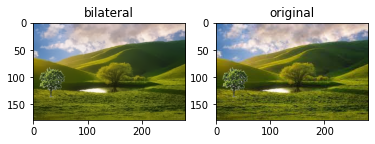

In [ ]:
bilateral=cv2.bilateralFilter(landscape_copy,21,21,21)

plt.subplot(1,2,1)
plt.title("bilateral")
plt.imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB))
cv2.imwrite("/content/bilateral.jpg",bilateral)


plt.subplot(1,2,2)
plt.title("original")
plt.imshow(cv2.cvtColor(landscape_copy, cv2.COLOR_BGR2RGB))

True

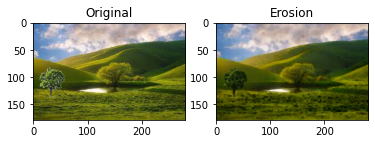

In [ ]:
kernel=np.ones((3,3),np.uint8)
erod=cv2.erode(landscape_copy,kernel)


plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(landscape_copy, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title("Erosion")
plt.imshow(cv2.cvtColor(erod, cv2.COLOR_BGR2RGB))
cv2.imwrite("/content/erod.jpg",erod)


True

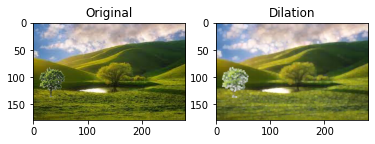

In [ ]:
kernel=np.ones((3,3),np.uint8)
dilated=cv2.dilate(landscape_copy,kernel)


plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(landscape_copy, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title("Dilation")
plt.imshow(cv2.cvtColor(dilated, cv2.COLOR_BGR2RGB))
cv2.imwrite("/content/dilated.jpg",dilated)


## Histogram

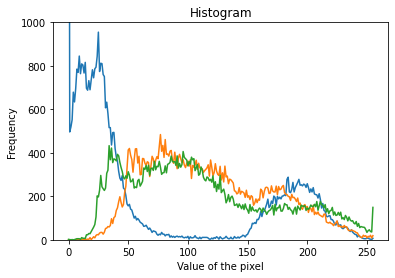

In [ ]:
#Histogram of the our image

colors=["b","g","r"]

for i ,col in enumerate(colors):
  hist=cv2.calcHist([landscape_copy],[i],None,[256],[0,256])
  plt.ylim([0,1000])
  plt.title("Histogram")
  plt.xlabel('Value of the pixel')
  plt.ylabel('Frequency')
  plt.plot(hist)


[]

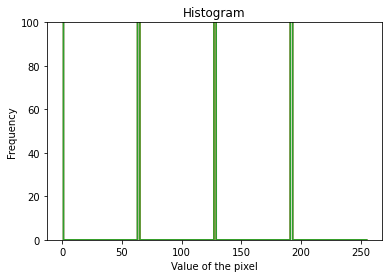

In [ ]:
#Histogram of the color reduced image

colors=["b","g","r"]

for i ,col in enumerate(colors):
  hist=cv2.calcHist([quantized],[i],None,[256],[0,256])
  plt.ylim([0,100])
  plt.title("Histogram")
  plt.xlabel('Value of the pixel')
  plt.ylabel('Frequency')
  plt.plot(hist)
plt.plot()


[]

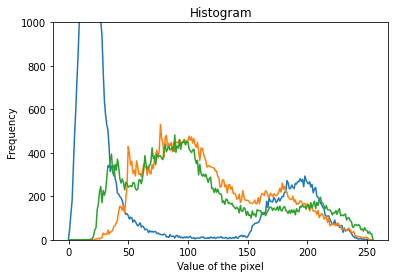

In [ ]:
#Histogram of the image on which Gaussian Filter was applied on.

colors=["b","g","r"]

for i ,col in enumerate(colors):
  hist=cv2.calcHist([gaussian_filter],[i],None,[256],[0,256])
  plt.ylim([0,1000])
  plt.title("Histogram")
  plt.plot(hist)
  plt.xlabel('Value of the pixel')
  plt.ylabel('Frequency')
plt.plot()


## Edge Detection

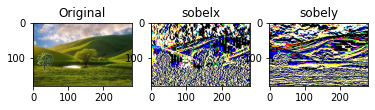

In [ ]:
#Trying Sobel edge detectors

sobelx=cv2.Sobel(landscape_copy,cv2.CV_32F,ksize=3,dx=1,dy=0)
sobely=cv2.Sobel(landscape_copy,cv2.CV_32F,ksize=3,dx=0,dy=1)

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(landscape_copy, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,2)
plt.title("sobelx")
plt.imshow(cv2.cvtColor(sobelx, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,3)
plt.title("sobely")
plt.imshow(cv2.cvtColor(sobely, cv2.COLOR_BGR2RGB))

True

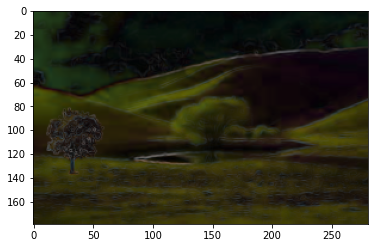

In [ ]:
#Trying skimage library for Sobel.

from skimage import data,filters
edges = filters.sobel(landscape_copy)  
plt.imshow(edges, cmap='gray')
cv2.imwrite("/content/skimage.jpg",edges)

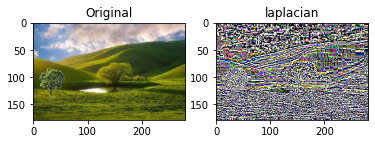

In [ ]:
#Trying Laplacian edge detector

laplacian=cv2.Laplacian(landscape_copy,cv2.CV_32F)

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(landscape_copy, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title("laplacian")
plt.imshow(cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB))

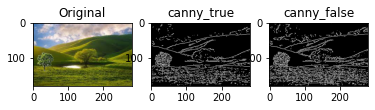

In [ ]:
#Trying Canny edge detectors

canny_true=cv2.Canny(landscape_copy,150,150,L2gradient=True)
canny_false=cv2.Canny(landscape_copy,150,150,L2gradient=False)


plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(landscape_copy, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,2)
plt.title("canny_true")
plt.imshow(cv2.cvtColor(canny_true, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,3)
plt.title("canny_false")
plt.imshow(cv2.cvtColor(canny_false, cv2.COLOR_BGR2RGB))

Result list (Sorted alphabetically):


1.   bilateral
2.   blue
3.   blur
4.   dilated
5.   erod
6.   green
7.   gaussian_filter
8.   landscape_copy
9.   median
10.  quantized
11.  red


## Now we try all of the edge detectors above, on our images in the list.

In [ ]:
res_list= [bilateral, blue, blur2, dilated, erod,
           green, gaussian_filter, landscape_copy, 
           median, quantized, red]

In [ ]:
edge_detectors=["Sobel_X", "Sobel_y", "Laplacian", "Canny_True", "Canny_False"]

In [ ]:
for index in range(len(res_list)):
  edge=cv2.Sobel(res_list[index],cv2.CV_32F,ksize=3,dx=1,dy=0)
  file_name="/content/Sobel_X"+str(index+1)+".jpg"
  cv2.imwrite(file_name,edge)

In [ ]:
for index in range(len(res_list)):
  edge=cv2.Sobel(res_list[index],cv2.CV_32F,ksize=3,dx=0,dy=1)
  file_name="/content/Sobel_Y"+str(index+1)+".jpg"
  cv2.imwrite(file_name,edge)

In [ ]:
for index in range(len(res_list)):
  edge=cv2.Laplacian(res_list[index],cv2.CV_32F)
  file_name="/content/Laplacian"+str(index+1)+".jpg"
  cv2.imwrite(file_name,edge)

In [ ]:
for index in range(len(res_list)):
  edge=cv2.Canny(res_list[index],150,150,L2gradient=True)
  file_name="/content/Canny_True"+str(index+1)+".jpg"
  cv2.imwrite(file_name,edge)

In [ ]:
for index in range(len(res_list)):
  edge=cv2.Canny(res_list[index],150,150,L2gradient=False)
  file_name="/content/Canny_False"+str(index+1)+".jpg"
  cv2.imwrite(file_name,edge)

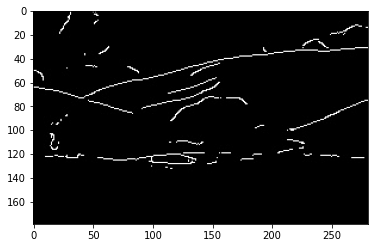

In [ ]:
# The best edge detection so far: Canny(false) on gaussian_filter
best_edge=cv2.imread("/content/Canny_False9.jpg")
plt.imshow(cv2.cvtColor(best_edge, cv2.COLOR_BGR2RGB))

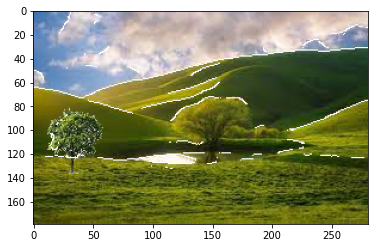

In [ ]:
comb=landscape_copy.copy()

for i in range(comb.shape[0]):
  for j in range(comb.shape[1]):
    if best_edge[i,j][0]>240 or best_edge[i,j][1]>240 or best_edge[i,j][2]>240:
      comb[i,j]=255
plt.imshow(cv2.cvtColor(comb, cv2.COLOR_BGR2RGB))

## Still needs to get more clear.
Since the Gaussan filter resulted a better image, we try to apply it two times and then use edge detector.

True

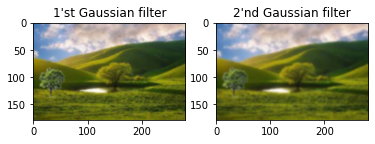

In [ ]:
gaussian_filter2=cv2.GaussianBlur(gaussian_filter,ksize=(5,5),sigmaX=1)

plt.subplot(1,2,1)
plt.title("1'st Gaussian filter")
plt.imshow(cv2.cvtColor(gaussian_filter, cv2.COLOR_BGR2RGB))


plt.subplot(1,2,2)
plt.title("2'nd Gaussian filter")
plt.imshow(cv2.cvtColor(gaussian_filter2, cv2.COLOR_BGR2RGB))
cv2.imwrite("/content/GaussianBlur2.jpg",gaussian_filter2)


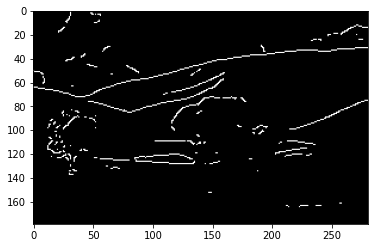

In [ ]:
canny_false_g2=cv2.Canny(gaussian_filter2,150,150,L2gradient=False)
plt.imshow(cv2.cvtColor(canny_false_g2, cv2.COLOR_BGR2RGB))



## Some of the edges were lost.
we try the bilateral filters.

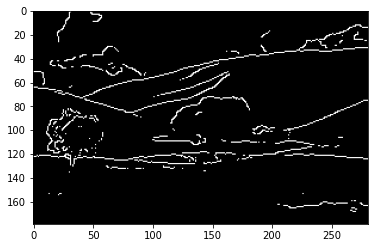

In [ ]:
bilateral_g=cv2.bilateralFilter(gaussian_filter,21,21,21)
bilateral_g2=cv2.bilateralFilter(bilateral_g,3,3,3)
bilateral_g3=cv2.bilateralFilter(bilateral_g2,25,25,25)


canny_false_b23=cv2.Canny(bilateral_g3,150,150,L2gradient=False)
plt.imshow(cv2.cvtColor(canny_false_b23, cv2.COLOR_BGR2RGB))


## The edges got more clear.

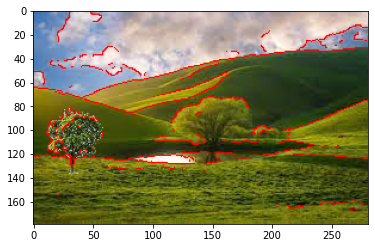

In [ ]:
comb2=landscape_copy.copy()

for i in range(comb2.shape[0]):
  for j in range(comb2.shape[1]):
    if canny_false_b23[i,j]>0:
      comb2[i,j][0]=comb2[i,j][1]=0
      comb2[i,j][2]=255
plt.imshow(cv2.cvtColor(comb2, cv2.COLOR_BGR2RGB))